In [1]:
import pandas as pd
from scipy import stats

# Load the dataset
regression_df = pd.read_csv('/content/drive/MyDrive/AI finalprototype/train.csv')

# Select only numerical columns and drop NaN values to avoid errors
numerical_cols = regression_df.select_dtypes(include=['number']).dropna()

# Compute Z-scores
z_scores = stats.zscore(numerical_cols, nan_policy='omit')

# Filter rows where all Z-scores are within the threshold of 3
regression_df_cleaned = regression_df[(abs(z_scores) < 3).all(axis=1)]

# Display number of rows before and after cleaning
print("Rows before cleaning:", regression_df.shape[0])
print("Rows after cleaning:", regression_df_cleaned.shape[0])



Rows before cleaning: 209673
Rows after cleaning: 192832


In [2]:
# Load dataset
regression_df = pd.read_csv("/content/drive/MyDrive/AI finalprototype/train.csv")

In [3]:
# Display basic info and check for missing values
print("Dataset Info:")
regression_df.info()
print("\nMissing values:")
print(regression_df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB

Missing values:
trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64


<Figure size 1400x1200 with 0 Axes>

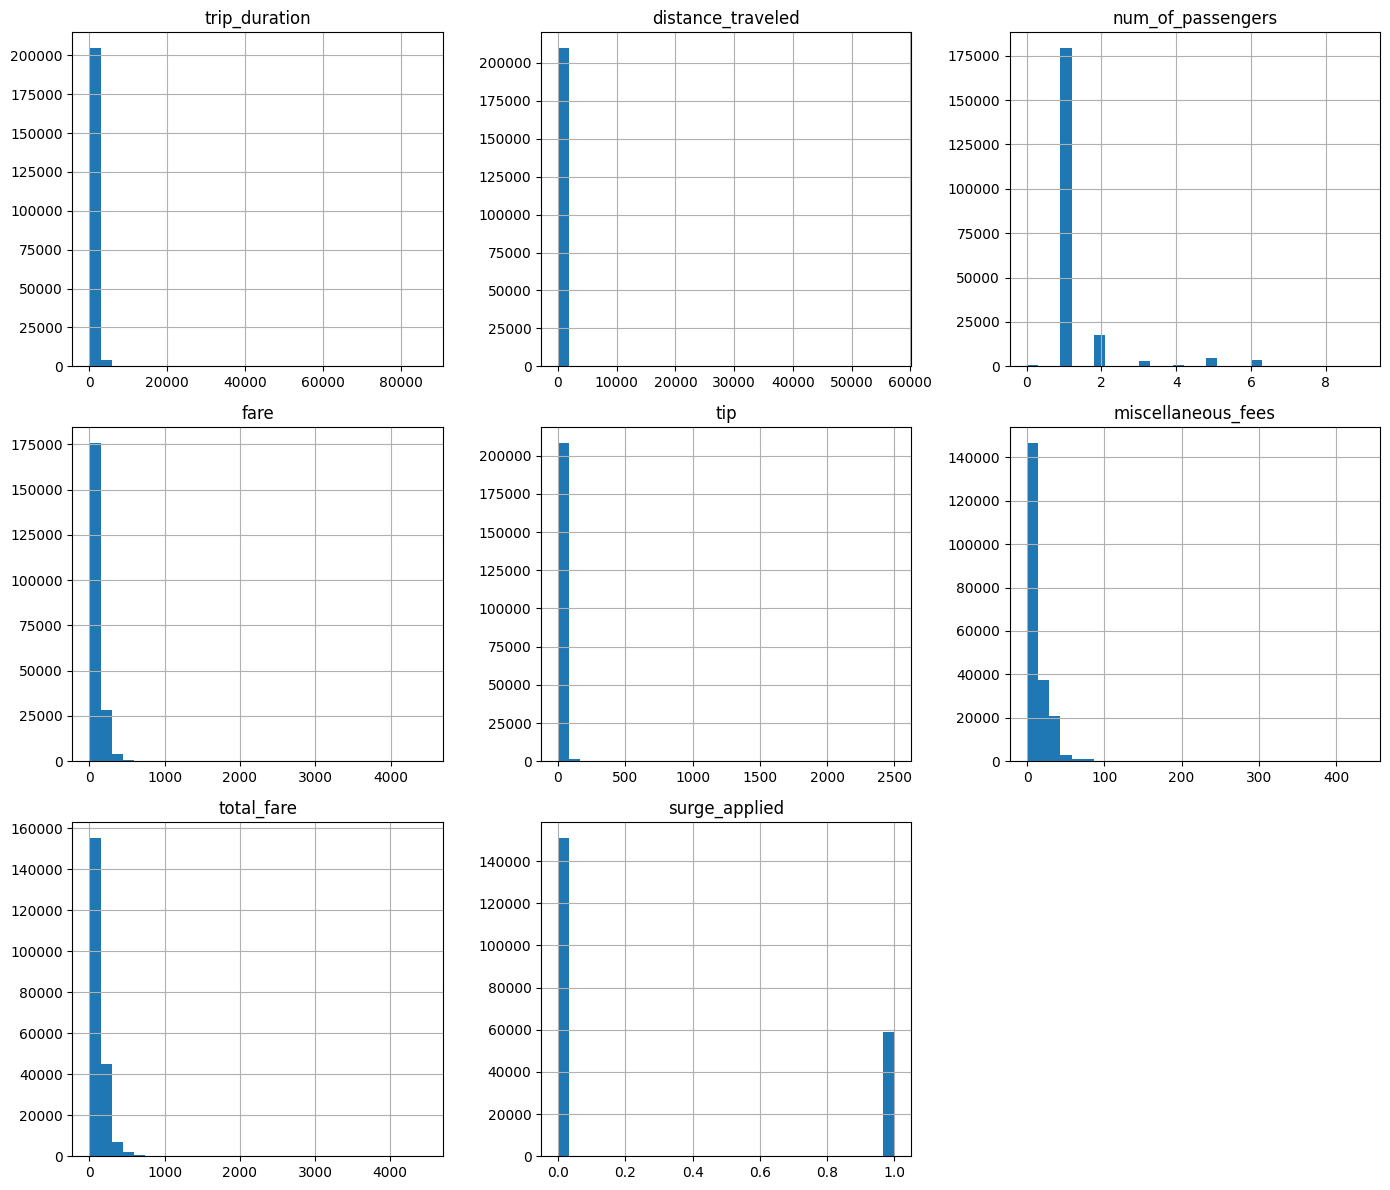

In [4]:
import math
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
regression_df = pd.read_csv("/content/drive/MyDrive/AI finalprototype/train.csv")

# Number of columns in the dataset
num_cols = len(regression_df.columns)

# Calculate the number of rows needed for the plots (3 plots per row)
rows = math.ceil(num_cols / 3)

# Create histograms for each column
plt.figure(figsize=(14, 12))
regression_df.hist(bins=30, figsize=(14, 12), layout=(rows, 3))
plt.tight_layout()
plt.show()

In [5]:
# Handling missing values (if any)
regression_df.fillna(regression_df.mean(), inplace=True)

In [9]:
import numpy as np
import pandas as pd
from scipy import stats

# Example: Creating a sample DataFrame
# regression_df = pd.read_csv('your_data.csv')  # Load your actual dataset

# Ensure only numerical columns are used
numeric_df = regression_df.select_dtypes(include=['number'])

# Compute Z-scores
z_scores = stats.zscore(numeric_df, nan_policy='omit')  # Ignore NaNs in calculations

# Remove rows with extreme outliers
regression_df_cleaned = regression_df[(np.abs(z_scores) < 3).all(axis=1)]


In [12]:
import numpy as np
import pandas as pd
from scipy import stats

# Example: Creating a sample DataFrame
# regression_df = pd.read_csv('your_data.csv')  # Load your actual dataset

# Ensure only numerical columns are used
numeric_df = regression_df.select_dtypes(include=['number'])

# Compute Z-scores
z_scores = stats.zscore(numeric_df, nan_policy='omit')  # Ignore NaNs in calculations

# Remove rows with extreme outliers
regression_df_cleaned = regression_df[(np.abs(z_scores) < 3).all(axis=1)]


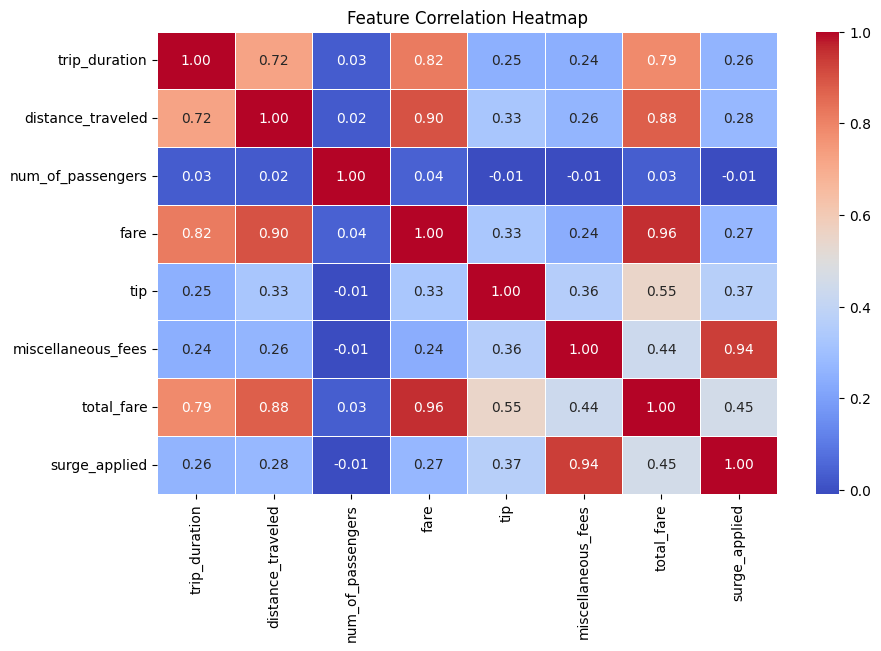

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn

# Checking correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(regression_df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [16]:
# Encoding categorical labels (if any exist)
if 'Result' in regression_df_cleaned.columns:
    label_encoder = LabelEncoder()
    regression_df_cleaned["Result"] = label_encoder.fit_transform(regression_df_cleaned["Result"])

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
# Feature and target selection
features = ["distance_traveled", "num_of_passengers", "fare", "miscellaneous_fees"]  # Adjust features as necessary
target = "total_fare"

if target in regression_df_cleaned.columns:
    X = regression_df_cleaned[features]
    y = regression_df_cleaned[target]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    print("Data preprocessing completed.")
else:
    print(f"Target '{target}' not found in the dataset.")


Data preprocessing completed.
